In [1]:
from datasets import load_dataset, DatasetDict

dataset = load_dataset("deepghs/nsfw_detect")
train_val_dataset = dataset['train'].train_test_split(test_size=0.1)
train_val_test_dataset = train_val_dataset['test'].train_test_split(test_size=0.5)
dataset = DatasetDict({
    'train': train_val_dataset['train'],
    'val': train_val_test_dataset['test'],
    'test': train_val_test_dataset['train']
})
print(dataset)

/Users/joshuagao/miniconda3/envs/hugging-face/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset imagefolder (/Users/joshuagao/.cache/huggingface/datasets/deepghs___imagefolder/deepghs--nsfw_detect-d3225d882e868a19/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 1/1 [00:00<00:00, 27.47it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 25200
    })
    val: Dataset({
        features: ['image', 'label'],
        num_rows: 1400
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1400
    })
})


In [2]:
import torch
import os
import numpy as np

def preprocess_dataset(dataset):
    transformed_dataset = dataset.map(transforms, batched=True).with_format('torch')
    torch.save(transformed_dataset, "preprocessed_nsfw_detect.pt")
    return transformed_dataset

def transforms(examples):
    examples["image"] = [image.convert("RGB").resize((224,224)) for image in examples["image"]]
    return examples

if not os.path.exists("preprocessed_nsfw_detect.pt"):
    # Preprocess the dataset and save the preprocessed version
    dataset = preprocess_dataset(dataset['test'])
else:
    # Load the preprocessed dataset
    dataset = torch.load("preprocessed_nsfw_detect.pt").with_format('torch')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 25200
    })
    val: Dataset({
        features: ['image', 'label'],
        num_rows: 1400
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1400
    })
})


In [1]:
from dataset import dataset

Initializing database...


Found cached dataset imagefolder (/Users/joshuagao/.cache/huggingface/datasets/deepghs___imagefolder/deepghs--nsfw_detect-d3225d882e868a19/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 1/1 [00:00<00:00, 150.22it/s]


Applying transforms to database...


FileNotFoundError: [Errno 2] Failed to open local file '/root/.cache/huggingface/datasets/deepghs___imagefolder/deepghs--nsfw_detect-d3225d882e868a19/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff/cache-a15d2a3efafb4b7c.arrow'. Detail: [errno 2] No such file or directory

In [ ]:
from torch.utils.data import DataLoader

val_dataloader = DataLoader(dataset['test'], batch_size=10, shuffle=True)

tensor([[[ 58,  58,  60],
         [ 58,  58,  60],
         [ 58,  58,  60],
         ...,
         [ 66,  57,  48],
         [ 66,  57,  48],
         [ 66,  57,  48]],

        [[ 58,  58,  60],
         [ 58,  58,  60],
         [ 58,  58,  60],
         ...,
         [ 66,  57,  48],
         [ 66,  57,  48],
         [ 66,  57,  48]],

        [[ 58,  58,  60],
         [ 58,  58,  60],
         [ 58,  58,  60],
         ...,
         [ 66,  57,  48],
         [ 66,  57,  48],
         [ 66,  57,  48]],

        ...,

        [[ 24,  15,   8],
         [ 34,  25,  15],
         [ 32,  23,  14],
         ...,
         [178, 152, 129],
         [179, 153, 130],
         [180, 154, 131]],

        [[ 35,  26,  17],
         [ 27,  18,   9],
         [ 23,  14,   5],
         ...,
         [177, 151, 128],
         [178, 152, 129],
         [180, 154, 131]],

        [[ 25,  16,   7],
         [ 23,  14,   5],
         [ 24,  15,   6],
         ...,
         [177, 151, 128],
        

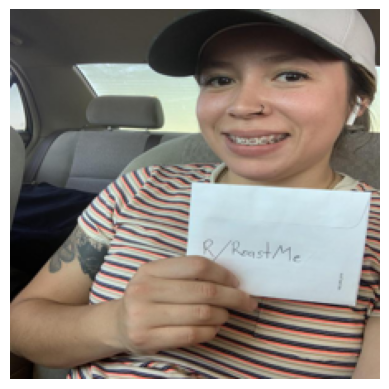

hentai


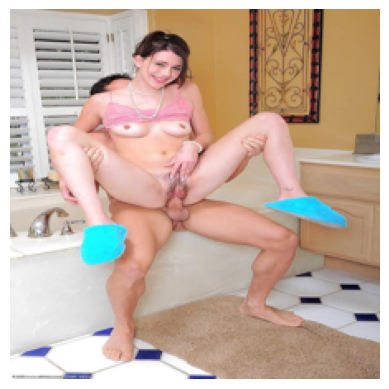

porn


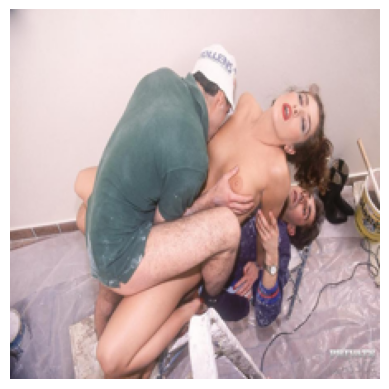

sexy


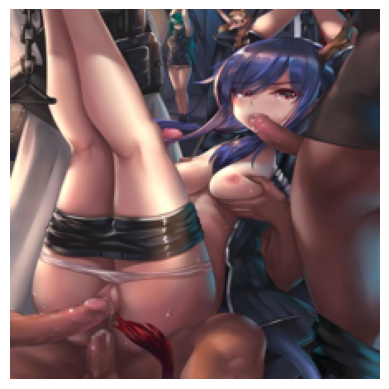

sexy


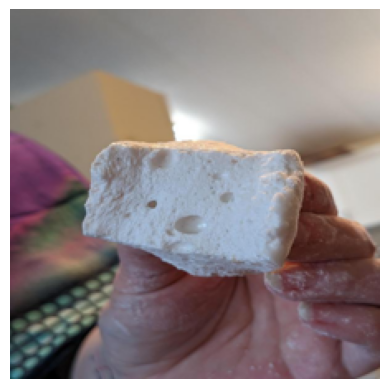

porn


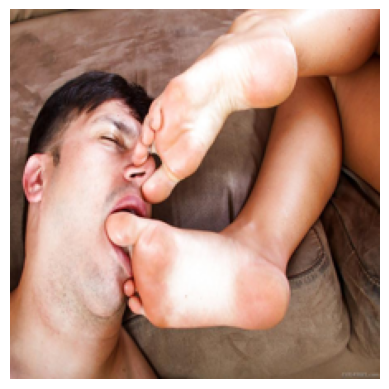

neutral


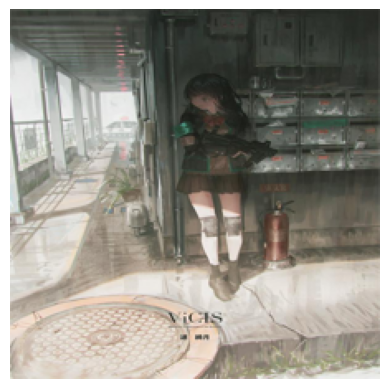

sexy


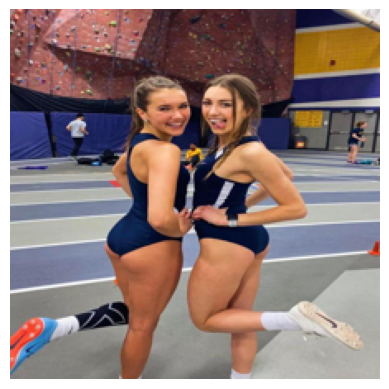

drawing


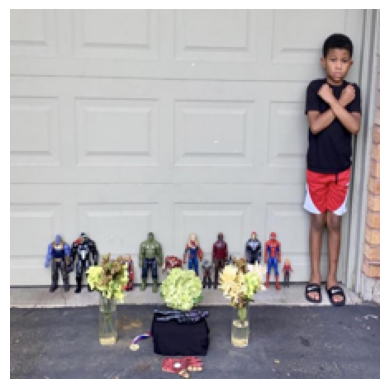

drawing


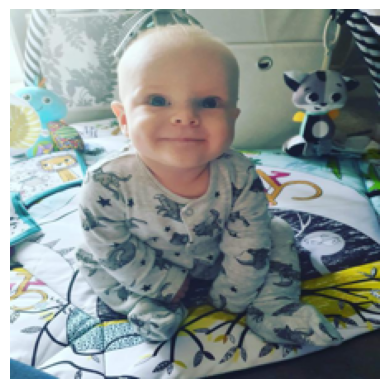

In [7]:
from resnet import resnet18
import matplotlib.pyplot as plt

classes = ['drawing', 'hentai', 'neutral', 'porn', 'sexy']

batch = next(iter(val_dataloader))
images = batch['image']
labels = batch['label']

model = resnet18
checkpoint = torch.load('models/Epoch9.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
print(images[0])
predictions = model(images.permute(0, 3, 1, 2).float())

for image, label, pred in zip(images, labels, predictions):
    pred = pred.tolist()
    pred = classes[pred.index(max(pred))]
    print(pred)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

tensor(3)


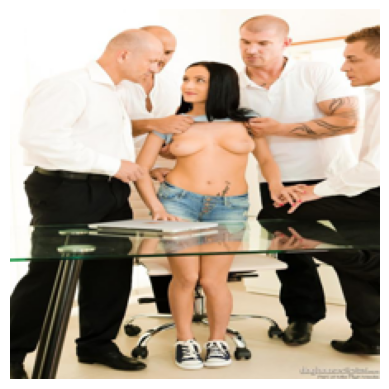

tensor(2)


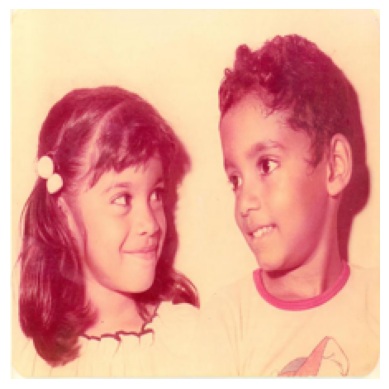

tensor(0)


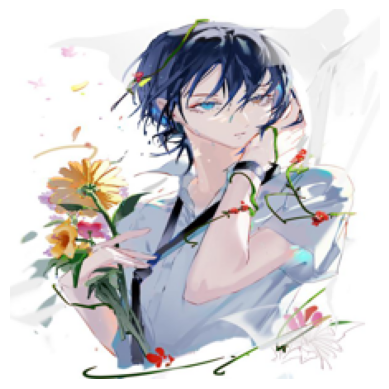

tensor(4)


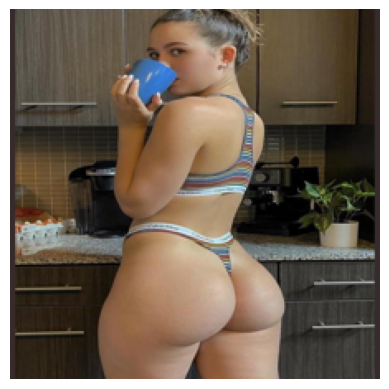

tensor(3)


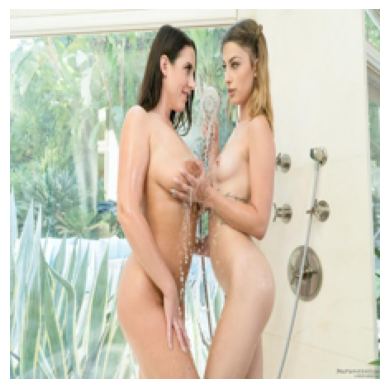

tensor(0)


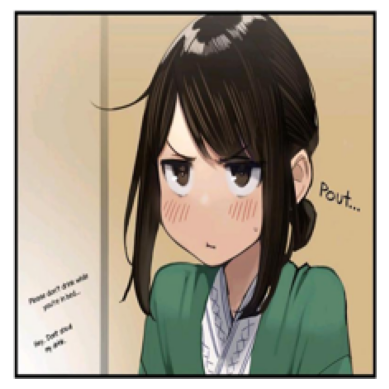

tensor(4)


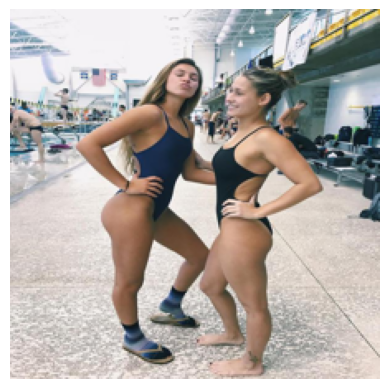

tensor(2)


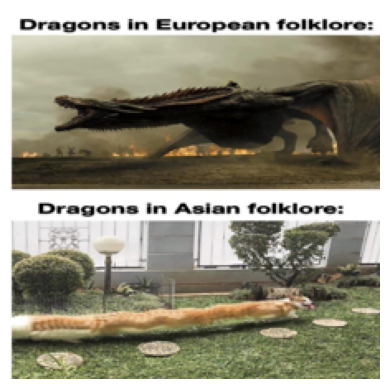

tensor(2)


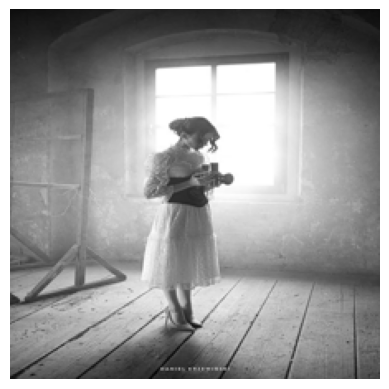

tensor(4)


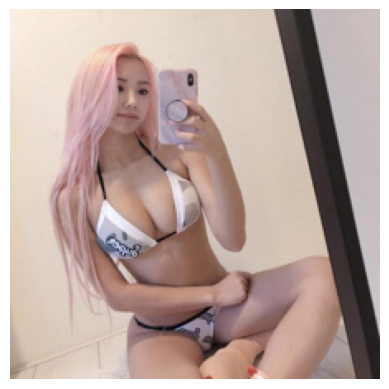

In [8]:
import matplotlib.pyplot as plt

batch = next(iter(val_dataloader))
images = batch['image']
labels = batch['label']

for image, label in zip(images, labels):
    print(label)
    plt.axis('off')
    plt.imshow(image)
    plt.show()
